In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('sales_data_sample.csv', encoding = 'latin1')

In [7]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [9]:
num_data = df.select_dtypes(include= ['float64', 'int64'])
num_data = num_data.drop(columns = ['ORDERNUMBER'], errors = 'ignore')
num_data = num_data.dropna()

In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_data)

In [13]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
    

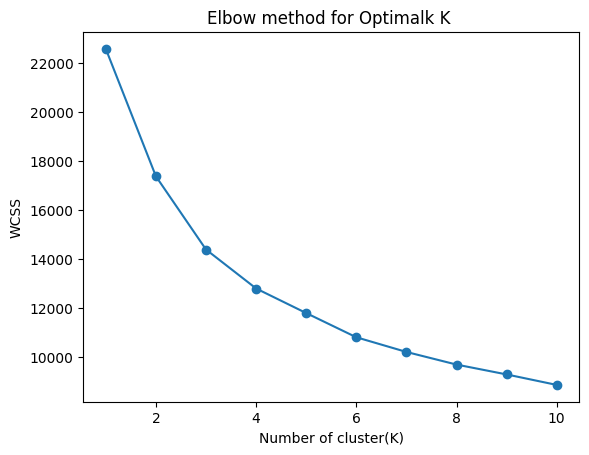

In [14]:
plt.plot(range(1, 11), wcss, marker= 'o')
plt.title('Elbow method for Optimalk K ')
plt.xlabel('Number of cluster(K)')
plt.ylabel("WCSS")
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 4, init= 'k-means++', random_state = 42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

print(df[['Cluster'] + list(num_data.columns)].head())

   Cluster  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  QTR_ID  \
0        0               30      95.70                2  2871.00       1   
1        0               34      81.35                5  2765.90       2   
2        2               41      94.74                2  3884.34       3   
3        2               45      83.26                6  3746.70       3   
4        2               49     100.00               14  5205.27       4   

   MONTH_ID  YEAR_ID  MSRP  
0         2     2003    95  
1         5     2003    95  
2         7     2003    95  
3         8     2003    95  
4        10     2003    95  
